In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


In [10]:
data = pd.read_csv('stock price data.csv')

In [75]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,5-Mar-19,1995.4,2005.0,2007.00,1976.60,1985.05,1988.1,1987.11,2449622,4.867670e+09,151723,1394714,56.94
1,TCS,EQ,6-Mar-19,1988.1,1989.3,2015.00,1985.05,2005.00,1999.6,2001.30,2635047,5.273531e+09,179625,1257394,47.72
2,TCS,EQ,7-Mar-19,1999.6,2005.0,2024.05,2000.20,2015.00,2013.3,2014.40,2539884,5.116330e+09,126121,1392383,54.82
3,TCS,EQ,8-Mar-19,2013.3,2025.0,2033.00,2010.05,2022.75,2022.7,2023.03,2031071,4.108922e+09,116872,971744,47.84
4,TCS,EQ,11-Mar-19,2022.7,2028.9,2033.00,2003.65,2016.15,2014.8,2017.10,3111689,6.276594e+09,104833,2195339,70.55


In [76]:
data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
4958,INFY,EQ,25-Feb-21,1274.30,1288.45,1299.75,1272.00,1275.00,1274.55,1283.44,8788221,1.127913e+10,215308,5860547,66.69
4959,INFY,EQ,26-Feb-21,1274.55,1269.00,1274.30,1244.75,1252.00,1253.30,1256.57,15132388,1.901486e+10,296665,9161967,60.55
4960,INFY,EQ,1-Mar-21,1253.30,1263.30,1284.50,1259.00,1271.00,1267.00,1271.66,5756286,7.320037e+09,133035,3344135,58.10
4961,INFY,EQ,2-Mar-21,1267.00,1282.25,1310.00,1279.20,1308.60,1304.50,1294.56,10461434,1.354293e+10,182506,6551888,62.63
4962,INFY,EQ,3-Mar-21,1304.50,1319.20,1347.00,1308.00,1340.95,1343.55,1329.25,9056399,1.203822e+10,189231,4897964,54.08


In [14]:
data.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  4963 non-null   object 
 1   Series                  4963 non-null   object 
 2   Date                    4963 non-null   object 
 3   Prev Close              4963 non-null   float64
 4   Open Price              4963 non-null   float64
 5   High Price              4963 non-null   float64
 6   Low Price               4963 non-null   float64
 7   Last Price              4963 non-null   float64
 8   Close Price             4963 non-null   float64
 9   Average Price           4963 non-null   float64
 10  Total Traded Quantity   4963 non-null   int64  
 11  Turnover                4963 non-null   float64
 12  No. of Trades           4963 non-null   int64  
 13  Deliverable Qty         4963 non-null   int64  
 14  % Dly Qt to Traded Qty  4963 non-null   

In [16]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [17]:
data1 = data.drop(['Date','Series','Prev Close','Open Price','High Price','Total Traded Quantity','Symbol'], axis =1)

In [24]:
data1.head(5)

,Low Price,Last Price,Close Price,Average Price,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,1976.60,1985.05,1988.1,1987.11,4.867670e+09,151723,1394714,56.94
1,1985.05,2005.00,1999.6,2001.30,5.273531e+09,179625,1257394,47.72
2,2000.20,2015.00,2013.3,2014.40,5.116330e+09,126121,1392383,54.82
3,2010.05,2022.75,2022.7,2023.03,4.108922e+09,116872,971744,47.84
4,2003.65,2016.15,2014.8,2017.10,6.276594e+09,104833,2195339,70.55


In [19]:
data1.shape

(4963, 8)

In [20]:
data.shape

(4963, 15)

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,4963.0,1.314279e+03,9.504107e+02,58.45,6.926500e+02,9.857000e+02,1.853625e+03,4.402450e+03
Open Price,4963.0,1.316498e+03,9.529233e+02,57.80,6.930000e+02,9.865000e+02,1.849050e+03,4.430000e+03
High Price,4963.0,1.336895e+03,9.673233e+02,61.20,7.049750e+02,9.999500e+02,1.889000e+03,4.483000e+03
Low Price,4963.0,1.296068e+03,9.381988e+02,56.00,6.803250e+02,9.750500e+02,1.826275e+03,4.338000e+03
Last Price,4963.0,1.315532e+03,9.515290e+02,58.80,6.926750e+02,9.850000e+02,1.859050e+03,4.430000e+03
Close Price,4963.0,1.315571e+03,9.514460e+02,58.45,6.926500e+02,9.867000e+02,1.858800e+03,4.402450e+03
Average Price,4963.0,1.316473e+03,9.523139e+02,59.22,6.934400e+02,9.850800e+02,1.856740e+03,4.389470e+03
Total Traded Quantity,4963.0,4.186486e+06,7.087660e+06,716.00,1.478740e+05,1.609373e+06,5.839776e+06,1.303677e+08
Turnover,4963.0,2.620953e+09,4.284134e+09,2199844.90,2.226899e+08,9.183005e+08,3.439517e+09,8.323905e+10
No. of Trades,4963.0,6.514320e+04,7.908952e+04,1.00,1.204750e+04,3.643100e+04,9.722850e+04,1.643015e+06


In [25]:
data.Symbol.value_counts()

WIPRO       497
INFY        497
TCS         497
MPHASIS     496
BEL         496
LTI         496
OFSS        496
TECHM       496
LTTS        496
MINDTREE    496
Name: Symbol, dtype: int64

<AxesSubplot:>

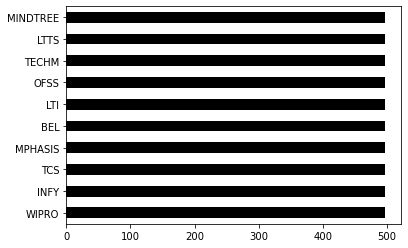

In [133]:
data['Symbol'].value_counts().plot(kind='barh',color='black',)

In [77]:
data.Series.value_counts()

EQ    4960
BL       3
Name: Series, dtype: int64

<AxesSubplot:>

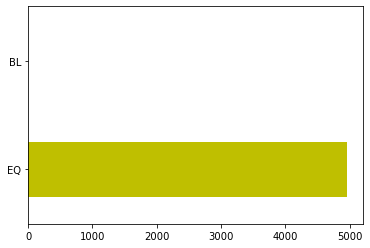

In [132]:
data['Series'].value_counts().plot(kind='barh',color='y',)

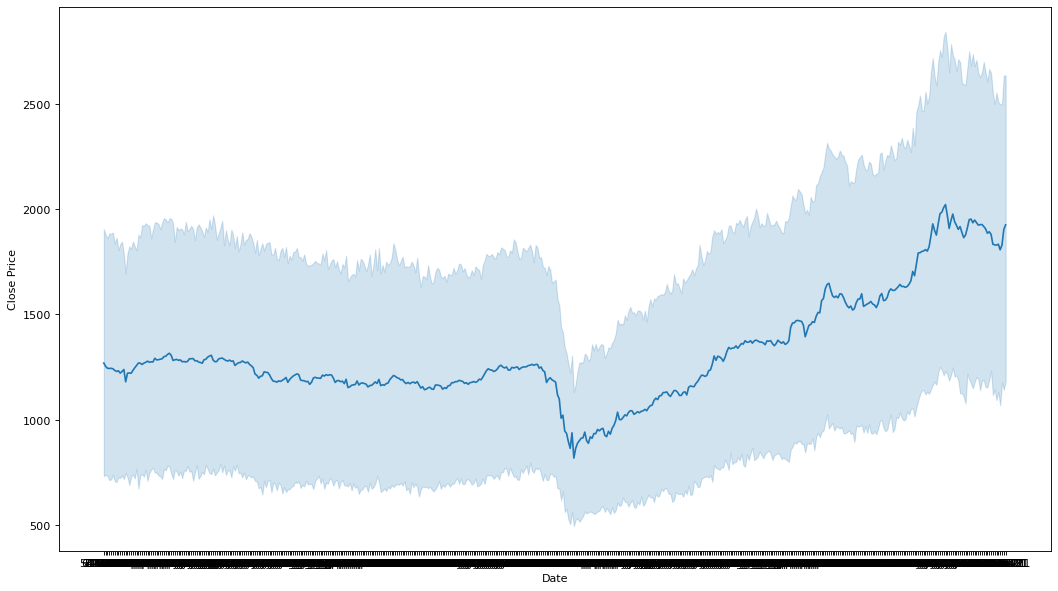

In [44]:
figure(figsize=(16, 9), dpi=80)
sns.lineplot(x ='Date', y = 'Close Price',data=data)#,hue='symbol')
plt.show()

In [48]:
data['Date'][0]

'5-Mar-19'

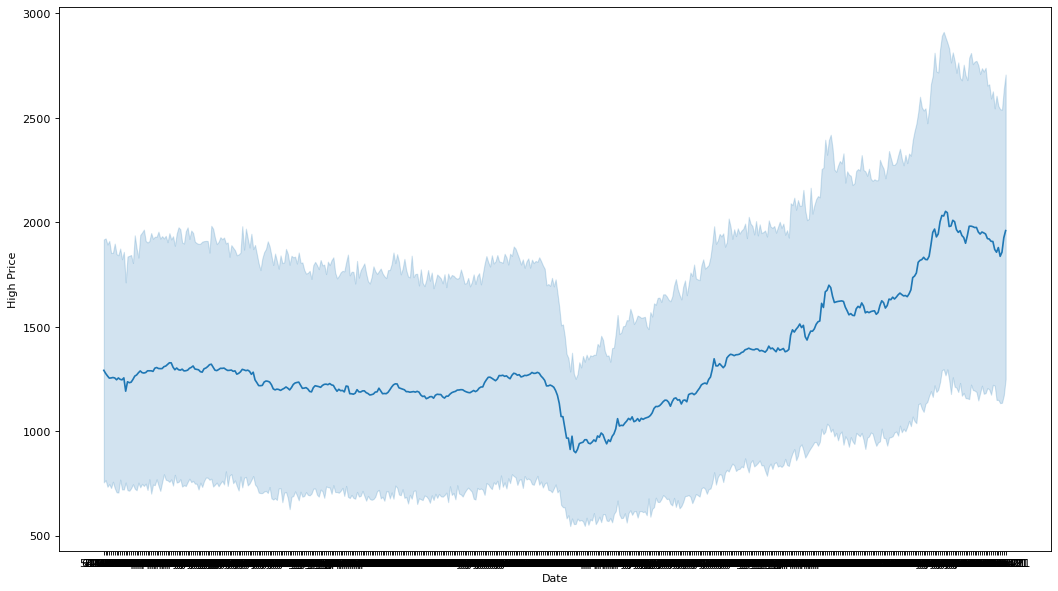

In [60]:
figure(figsize=(16, 9), dpi=80)
#plt.plot(data['Date'] ,data['High Price'],color='r')
sns.lineplot(x ='Date', y = 'High Price',data=data)#,hue='series',color='r')
plt.show()

<AxesSubplot:>

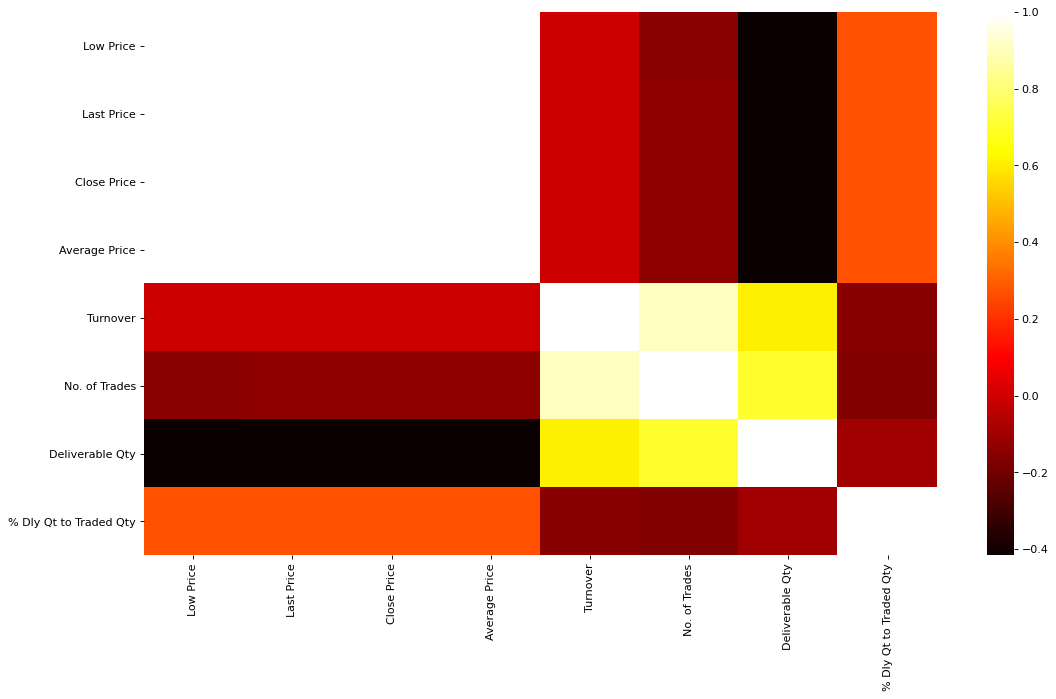

In [64]:
figure(figsize=(16, 9), dpi=80)
sns.heatmap(data1.corr(),cmap='hot')

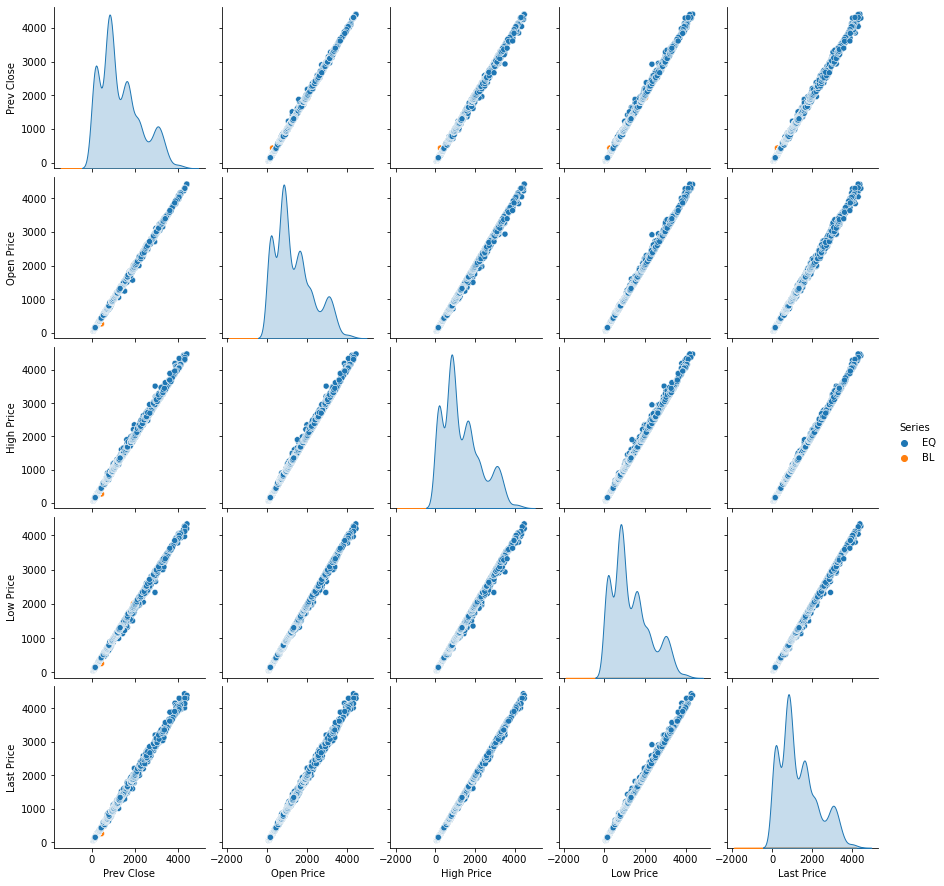

In [73]:
sns.pairplot(vars=[ 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price'],data=data,hue='Series')

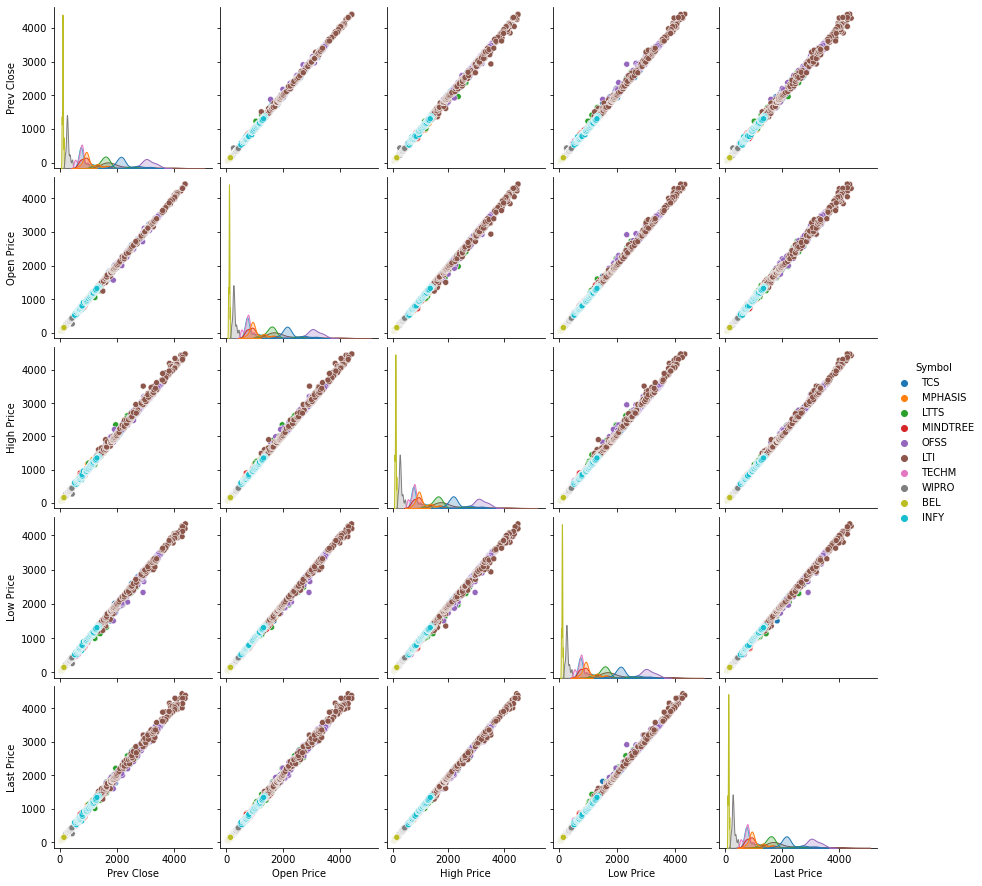

In [74]:
sns.pairplot(vars=[ 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price'],data=data,hue='Symbol')

<AxesSubplot:xlabel='Total Traded Quantity', ylabel='High Price'>

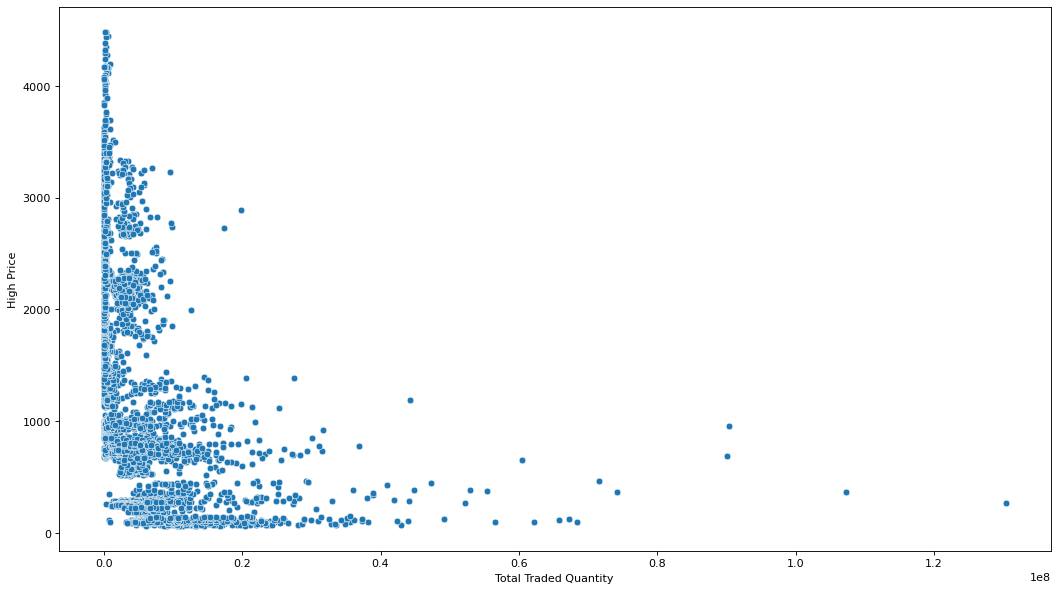

In [123]:
figure(figsize=(16, 9), dpi=80)
sns.scatterplot(y='High Price',x='Total Traded Quantity',data=data,palette='')

<AxesSubplot:xlabel='No. of Trades', ylabel='Turnover'>

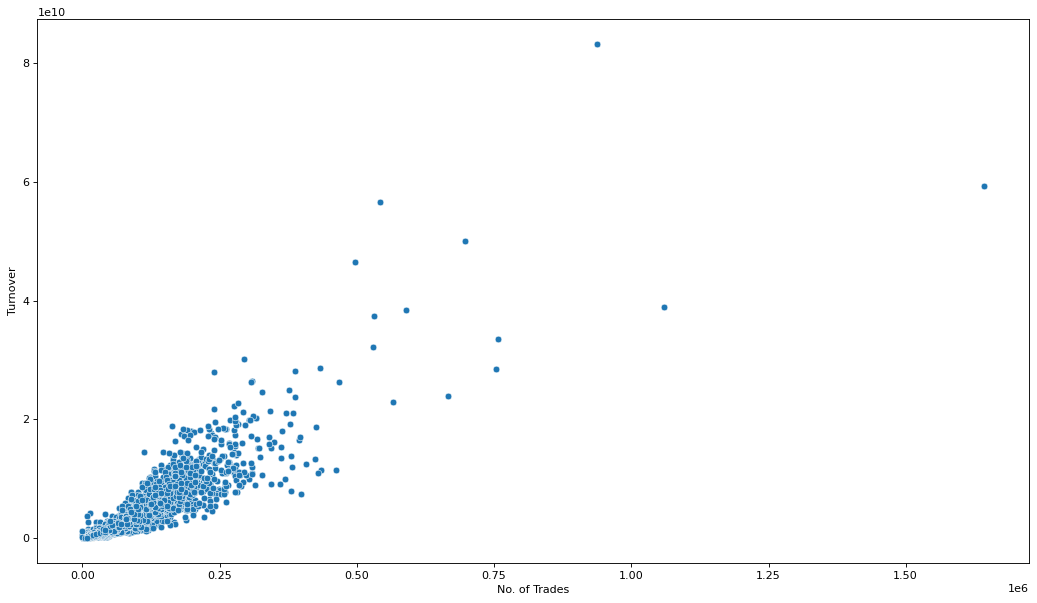

In [124]:
figure(figsize=(16, 9), dpi=80)
sns.scatterplot(y='Turnover',x='No. of Trades',data=data,palette='')

In [125]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

C:\Users\trymo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\trymo\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open Price', ylabel='Density'>

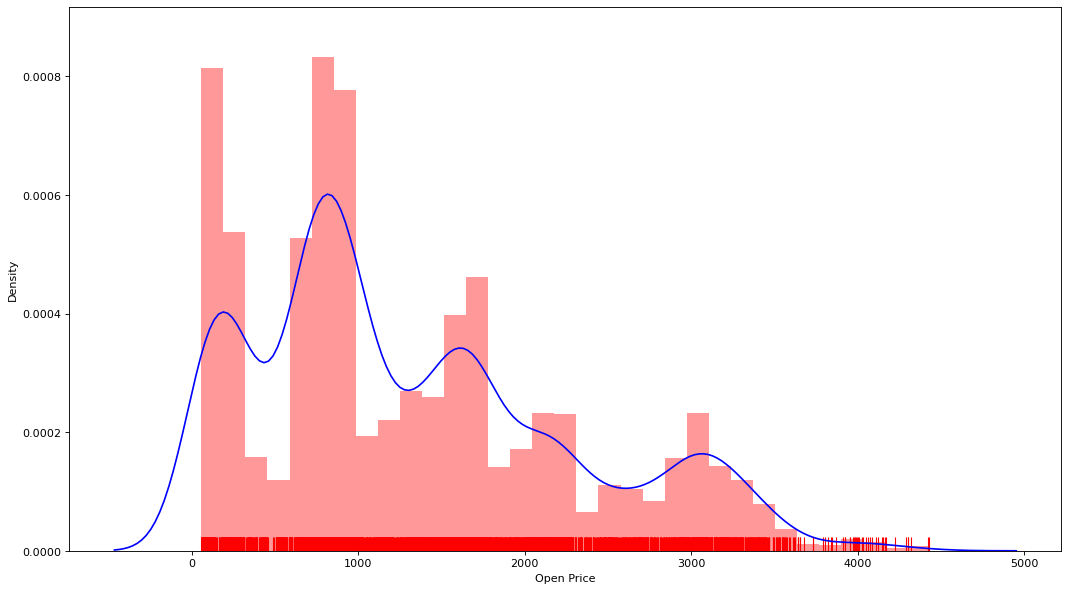

In [128]:
figure(figsize=(16, 9), dpi=80)
sns.distplot(data['Open Price'],rug='True',color='red',kde_kws={'color':'blue'})

In [79]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [89]:
C =pd.Series(data['Close Price'].values, index =data['Date'])

In [90]:
C

Date
5-Mar-19     1988.10
6-Mar-19     1999.60
7-Mar-19     2013.30
8-Mar-19     2022.70
11-Mar-19    2014.80
              ...   
25-Feb-21    1274.55
26-Feb-21    1253.30
1-Mar-21     1267.00
2-Mar-21     1304.50
3-Mar-21     1343.55
Length: 4963, dtype: float64

In [92]:
C.isnull().sum()

0

In [100]:
data['Close Price']

0       1988.10
1       1999.60
2       2013.30
3       2022.70
4       2014.80
         ...   
4958    1274.55
4959    1253.30
4960    1267.00
4961    1304.50
4962    1343.55
Name: Close Price, Length: 4963, dtype: float64

<AxesSubplot:xlabel='Date'>

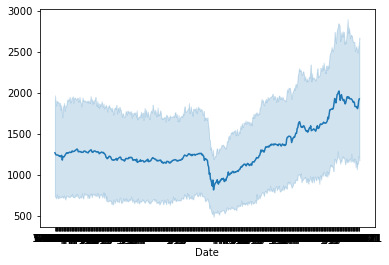

In [103]:
sns.lineplot(x=C.index,y=C.values,data=C)

In [104]:
X =C.values
size =int(len(X) * 0.8)
train,test =X[0:size],X[size:len(X)]

In [105]:
history=[x for x in train]
predictions=list()
#forward validation
for t in range(len(test)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f,expected=%f' % (yhat,obs))

predicted=434.595923,expected=90.150000
predicted=93.482101,expected=92.100000
predicted=106.277253,expected=89.350000
predicted=93.208729,expected=87.200000
predicted=82.866822,expected=91.650000
predicted=88.366726,expected=91.200000
predicted=91.031582,expected=93.600000
predicted=93.490323,expected=93.200000
predicted=93.148799,expected=94.950000
predicted=94.959203,expected=94.350000
predicted=94.316761,expected=96.700000
predicted=96.698311,expected=93.500000
predicted=93.465046,expected=91.050000
predicted=91.190175,expected=91.800000
predicted=91.949139,expected=92.400000
predicted=92.370739,expected=92.100000
predicted=92.008284,expected=92.450000
predicted=92.437759,expected=93.250000
predicted=93.245409,expected=95.900000
predicted=95.837148,expected=100.850000
predicted=100.682332,expected=97.250000
predicted=97.075057,expected=97.350000
predicted=97.483739,expected=96.800000
predicted=96.929859,expected=95.000000
predicted=95.042440,expected=95.800000
predicted=95.835988,e

predicted=100.855534,expected=96.950000
predicted=97.052770,expected=96.350000
predicted=96.581009,expected=95.450000
predicted=95.527209,expected=97.000000
predicted=96.952709,expected=97.200000
predicted=97.098094,expected=98.000000
predicted=97.949322,expected=99.850000
predicted=99.806724,expected=103.850000
predicted=103.741025,expected=105.750000
predicted=105.560576,expected=108.600000
predicted=108.481611,expected=105.000000
predicted=104.973707,expected=105.050000
predicted=105.228039,expected=100.950000
predicted=101.086079,expected=101.150000
predicted=101.294005,expected=101.850000
predicted=101.843358,expected=101.650000
predicted=101.569326,expected=100.200000
predicted=100.179072,expected=100.550000
predicted=100.617820,expected=100.750000
predicted=100.753306,expected=90.650000
predicted=90.727420,expected=84.950000
predicted=85.407876,expected=83.500000
predicted=83.858858,expected=84.850000
predicted=84.825718,expected=86.900000
predicted=86.666576,expected=87.000000


predicted=88.613727,expected=89.400000
predicted=89.286771,expected=88.900000
predicted=88.846624,expected=92.900000
predicted=92.893411,expected=92.450000
predicted=92.324560,expected=93.050000
predicted=93.020071,expected=95.400000
predicted=95.401771,expected=95.700000
predicted=95.628704,expected=94.250000
predicted=94.232127,expected=96.700000
predicted=96.764853,expected=96.600000
predicted=96.544367,expected=96.150000
predicted=96.117158,expected=96.550000
predicted=96.582378,expected=103.100000
predicted=103.039924,expected=108.350000
predicted=108.017572,expected=106.000000
predicted=105.745089,expected=107.700000
predicted=107.809148,expected=106.850000
predicted=106.947154,expected=108.900000
predicted=108.914755,expected=111.100000
predicted=111.001422,expected=111.800000
predicted=111.687468,expected=113.550000
predicted=113.497587,expected=115.000000
predicted=114.954571,expected=115.750000
predicted=115.695253,expected=114.950000
predicted=114.942490,expected=113.150000


predicted=802.430326,expected=802.550000
predicted=802.555624,expected=784.650000
predicted=784.775883,expected=802.500000
predicted=803.066151,expected=806.950000
predicted=806.444592,expected=814.900000
predicted=814.225894,expected=814.250000
predicted=813.947057,expected=821.300000
predicted=821.393755,expected=834.050000
predicted=833.781980,expected=840.150000
predicted=839.569217,expected=829.100000
predicted=828.923466,expected=820.100000
predicted=820.802268,expected=816.400000
predicted=817.114767,expected=829.300000
predicted=829.323082,expected=827.700000
predicted=827.021186,expected=831.250000
predicted=831.006818,expected=829.850000
predicted=829.867937,expected=820.700000
predicted=820.919795,expected=805.000000
predicted=805.577876,expected=764.350000
predicted=765.523845,expected=794.050000
predicted=795.391634,expected=792.650000
predicted=791.621713,expected=782.550000
predicted=781.736439,expected=782.200000
predicted=782.608298,expected=805.650000
predicted=805.78

predicted=713.374548,expected=705.550000
predicted=705.336399,expected=703.700000
predicted=704.109853,expected=720.650000
predicted=720.777398,expected=714.150000
predicted=713.564811,expected=700.500000
predicted=700.625238,expected=748.200000
predicted=748.479713,expected=731.750000
predicted=730.266382,expected=735.950000
predicted=735.825319,expected=731.900000
predicted=732.412397,expected=756.600000
predicted=756.707697,expected=762.700000
predicted=761.586282,expected=764.000000
predicted=763.477197,expected=794.150000
predicted=793.973752,expected=774.700000
predicted=774.025902,expected=781.700000
predicted=782.157020,expected=781.850000
predicted=782.164241,expected=797.050000
predicted=796.856746,expected=783.250000
predicted=782.694697,expected=830.950000
predicted=830.881517,expected=911.000000
predicted=908.569928,expected=903.150000
predicted=899.543876,expected=934.300000
predicted=933.908790,expected=936.750000
predicted=937.049259,expected=917.900000
predicted=918.37

In [109]:
#evaluation
from math import sqrt
rmse=sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.2f' % rmse)

Test RMSE: 24.77


Actual vs predicted

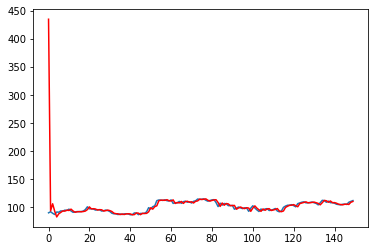

In [115]:
plt.plot(test[:150])
plt.plot(predictions[:150],color='r')
plt.show()

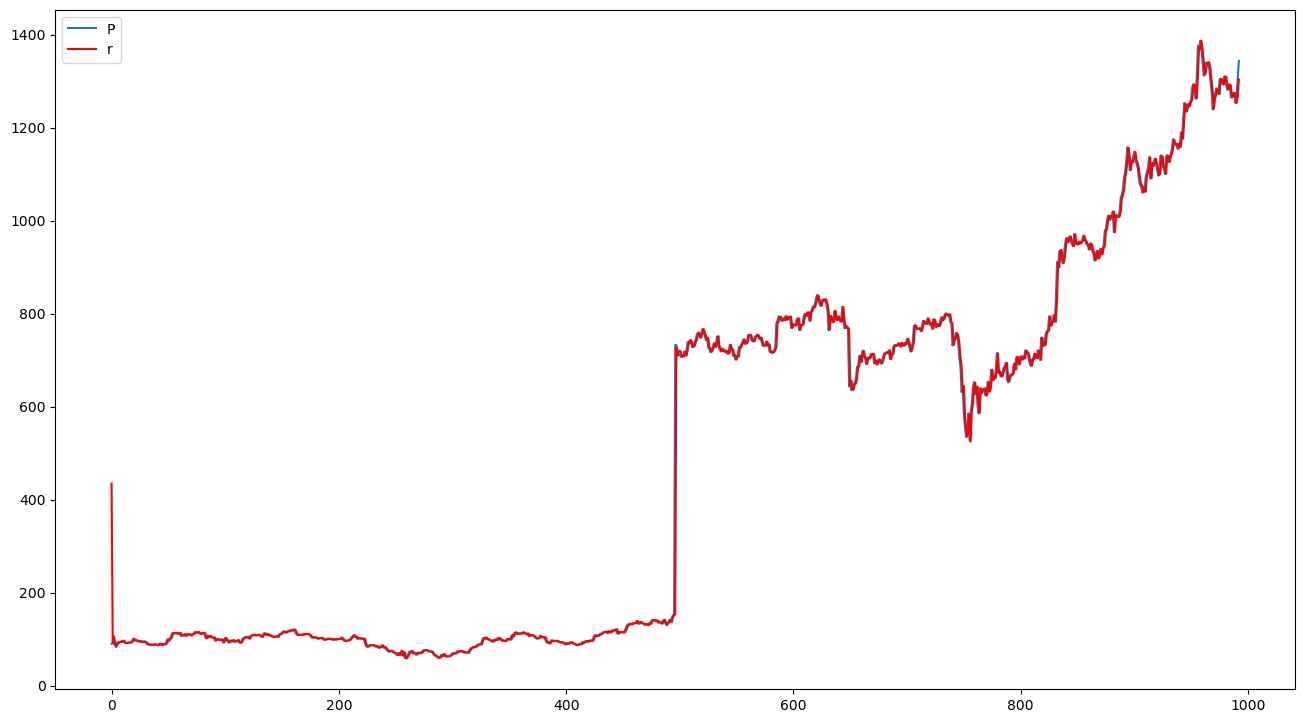

In [117]:
figure(figsize=(16, 9), dpi=100)
plt.plot(test,)
plt.legend('Actual values')
plt.plot(predictions, color='red')
plt.legend('Predicted vaues')
plt.show()